# Profiling

The performance measurements for the action-rules package were conducted using the Scalene profiler, a high-precision CPU, GPU, and memory profiler specifically designed for Python. Detailed profiling reports, which provide insights into the package's efficiency and resource usage, can be found in this directory. 

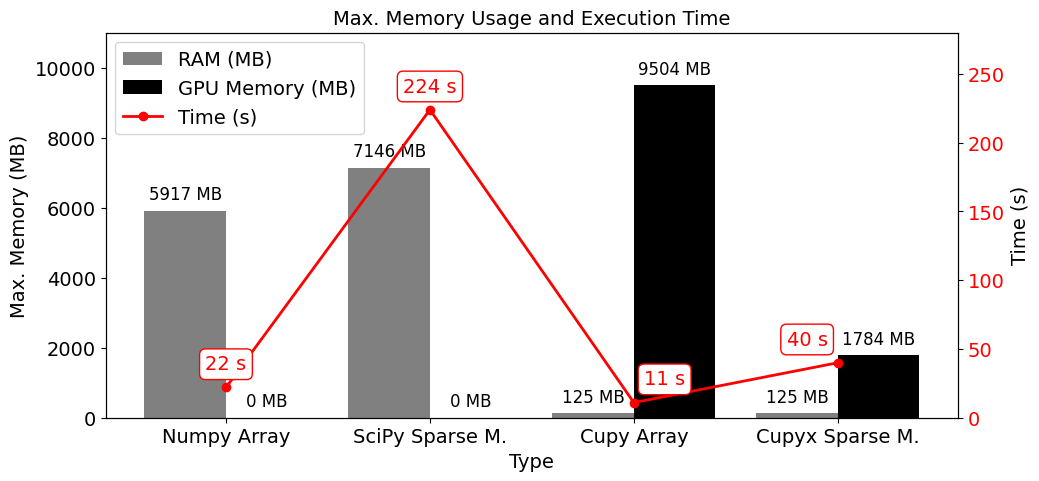

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create the dataframe from the scalene data
data = {
    "Type": ["Numpy Array", "SciPy Sparse M.", "Cupy Array", "Cupyx Sparse M."],
    "GPU Memory (MB)": [0, 0, 9504, 1784],
    "RAM (MB)": [5917, 7146, 125, 125],
    "Time (s)": [22, 224, 11, 40]
}

df = pd.DataFrame(data)

# Set the width of the bars
bar_width = 0.4
bar_positions = np.arange(len(df))

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(11, 5))

# Plot RAM and GPU Memory as separate bars
ram_bars = ax1.bar(bar_positions - bar_width/2, df["RAM (MB)"], bar_width, color='gray', label='RAM (MB)')
gpu_bars = ax1.bar(bar_positions + bar_width/2, df["GPU Memory (MB)"], bar_width, color='black', label='GPU Memory (MB)')

ax1.set_ylabel('Max. Memory (MB)', fontsize=14)
ax1.set_xlabel('Type', fontsize=14)
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(df["Type"], fontsize=14)
ax1.tick_params(axis='y', labelsize=14)

# Set the y-axis limit for memory
ax1.set_ylim(0, 11000)

# Add text annotations for Memory values
for i in range(len(df)):
    ax1.text(bar_positions[i] - bar_width/2, df["RAM (MB)"][i] + 200, f'{df["RAM (MB)"][i]} MB', ha='center', va='bottom', color='black', fontsize=12)
    ax1.text(bar_positions[i] + bar_width/2, df["GPU Memory (MB)"][i] + 200, f'{df["GPU Memory (MB)"][i]} MB', ha='center', va='bottom', color='black', fontsize=12)

# Create another y-axis for Time
ax2 = ax1.twinx()
time_line = ax2.plot(bar_positions, df["Time (s)"], color='red', marker='o', linestyle='-', linewidth=2, label='Time (s)')
ax2.set_ylabel('Time (s)', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red', labelsize=14)

# Set the y-axis limit for time
ax2.set_ylim(0, 280)

# Add text annotations for Time values with padding and white box with red border
for i, time in enumerate(df["Time (s)"]):
    if i == 2:
        ha = 'left'
        dx = 0.050
    elif i == 3:
        ha = 'right'
        dx = -0.050
    else:
        ha = 'center'
        dx = 0
    
    ax2.text(bar_positions[i] + dx, time + 10, f'{time} s', ha=ha, va='bottom', color='red', fontsize=14, 
             bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))

# Add legend for the second y-axis
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=14)

# Save the plot
plt.title("Max. Memory Usage and Execution Time", fontsize=14)
plt.savefig("memory_and_time.png", format='png', dpi=300)
plt.show()